In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
%matplotlib inline

In [3]:
data_prec_evap = pd.read_csv("data_rain_evapo.csv")
data_prec_evap

,month,precipitation,evapotranspiration,incidents,AVP
0,Jan,3.14,136.52,0,197.27
1,Feb,9.12,138.90,0,138.82
2,Mar,27.02,154.24,0,69.80
3,Apr,45.91,140.64,0,44.13
4,May,59.91,137.12,0,34.03
5,Jun,74.88,113.68,2,32.74
6,Jul,84.05,99.65,3,41.81
7,Aug,76.60,96.55,2,53.72
8,Sep,93.25,102.84,2,33.72
9,Oct,63.52,122.28,2,40.61


In [12]:
from scipy.stats.stats import pearsonr

In [15]:
print ('Correlazione da scipy tra incidenti e pioggia : %0.5f') % (pearsonr(data_prec_evap['precipitation'],data_prec_evap['incidents'])[0])
print ('Correlazione da scipy tra incidenti e evapotraspirazione : %0.5f') % (pearsonr(data_prec_evap['precipitation'],data_prec_evap['evapotranspiration'])[0])

Correlazione da scipy tra incidenti e pioggia : 0.83930
Correlazione da scipy tra incidenti e evapotraspirazione : -0.69412


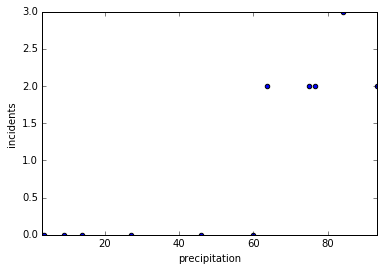

In [16]:
x_range = [data_prec_evap['precipitation'].min() , data_prec_evap['precipitation'].max()]
y_range = [data_prec_evap['incidents' ].min() , data_prec_evap['incidents' ].max()]
scatter_plot = data_prec_evap.plot(kind='scatter', x='precipitation' ,y='incidents',xlim=x_range, ylim=y_range)

In [10]:
import statsmodels.formula.api as smf

In [11]:
linear_regression_solo_pioggia = smf.ols(formula='incidents ~ precipitation', data=data_prec_evap)
fitted_model = linear_regression_solo_pioggia.fit()

In [6]:
fitted_model.summary()

C:\Users\Fabio\Anaconda2\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              incidents   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     23.83
Date:                Thu, 23 Jun 2016   Prob (F-statistic):           0.000640
Time:                        15:52:07   Log-Likelihood:                -11.020
No. Observations:                  12   AIC:                             26.04
Df Residuals:                      10   BIC:                             27.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -0.4332      0.336     -1.288      0.227        -1.183     0.316
precipitation     0.0292      0.006      4.882      0.001         0.016     0.043
==============================================================================
Omnibus:                        2.144   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                0.967
Skew:                          -0.695   Prob(JB):                        0.617
Kurtosis:                       2.938   Cond. No.                         98.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
linear_regression_pioggia_evap = smf.ols(formula='incidents ~ precipitation + evapotranspiration', data=data_prec_evap)
fitted_model_prec_evap = linear_regression_pioggia_evap.fit()
fitted_model_prec_evap.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              incidents   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     24.55
Date:                Thu, 23 Jun 2016   Prob (F-statistic):           0.000227
Time:                        15:52:07   Log-Likelihood:                -7.1433
No. Observations:                  12   AIC:                             20.29
Df Residuals:                       9   BIC:                             21.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              4.2916      1.673      2.566      0.030         0.508     8.075
precipitation          0.0166      0.006      2.621      0.028         0.002     0.031
evapotranspiration    -0.0333      0.012     -2.859      0.019        -0.060    -0.007
==============================================================================
Omnibus:                        1.192   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                0.736
Skew:                           0.143   Prob(JB):                        0.692
Kurtosis:                       1.820   Cond. No.                     1.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
import statsmodels.api as sm

In [25]:
y = data_prec_evap['incidents']
X = data_prec_evap['precipitation']
X = sm.add_constant(X)

In [26]:
y,X

(0     0
 1     0
 2     0
 3     0
 4     0
 5     2
 6     3
 7     2
 8     2
 9     2
 10    0
 11    0
 Name: incidents, dtype: int64,     const  precipitation
 0     1.0           3.14
 1     1.0           9.12
 2     1.0          27.02
 3     1.0          45.91
 4     1.0          59.91
 5     1.0          74.88
 6     1.0          84.05
 7     1.0          76.60
 8     1.0          93.25
 9     1.0          63.52
 10    1.0          13.78
 11    1.0           3.74)

In [23]:
#NON UGUALE A R MA PIU Pythonic
linear_regression_pioggia_pythonesco = sm.OLS(y,X)
fitted_model_pythonesco = linear_regression_pioggia_pythonesco.fit()
fitted_model_pythonesco.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              incidents   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     23.83
Date:                Thu, 23 Jun 2016   Prob (F-statistic):           0.000640
Time:                        16:03:59   Log-Likelihood:                -11.020
No. Observations:                  12   AIC:                             26.04
Df Residuals:                      10   BIC:                             27.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            -0.4332      0.336     -1.288      0.227        -1.183     0.316
precipitation     0.0292      0.006      4.882      0.001         0.016     0.043
==============================================================================
Omnibus:                        2.144   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                0.967
Skew:                          -0.695   Prob(JB):                        0.617
Kurtosis:                       2.938   Cond. No.                         98.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
print (fitted_model_pythonesco.params)

const           -0.433195
precipitation    0.029190
dtype: float64


In [28]:
betas = np.array(fitted_model_pythonesco.params)
fitted_values = fitted_model_pythonesco.predict(X)

In [36]:
def standardize(variable) :
    return (variable - np.mean(variable)) / np.std(variable)

def normalize(variable) :
    return (variable - min(variable)) / (max(variable) - min(variable))


In [37]:
print standardize(data_prec_evap['precipitation'])
print normalize(data_prec_evap['precipitation'])
print fitted_values

0    -1.344579
1    -1.158037
2    -0.599659
3    -0.010398
4     0.426322
5     0.893301
6     1.179353
7     0.946956
8     1.466341
9     0.538934
10   -1.012672
11   -1.325863
Name: precipitation, dtype: float64
0     0.000000
1     0.066363
2     0.265009
3     0.474642
4     0.630008
5     0.796138
6     0.897903
7     0.815226
8     1.000000
9     0.670070
10    0.118078
11    0.006659
Name: precipitation, dtype: float64
[-0.34153711 -0.16697849  0.35552977  0.90693653  1.31560221  1.75258258
  2.0202586   1.80279008  2.28881033  1.42097957 -0.0309512  -0.32402287]
